In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas import DataFrame

ON charge notre fichier

In [211]:
titanic_df = pd.read_csv("titanic-passangers.csv", sep=",")

In [212]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


DESCRIPTION DE NOTRE DATA FRAME

In [213]:
data=titanic_df.describe()
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#

LES INFORMATIONS SUR NOS DONNEES

In [214]:
df =titanic_df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

CHERCHONS LES DONNEES MANQUNANTES 

In [215]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

On a peut constante qui'il manque beaucoup de donnnees pour la colone age nous calculons le pourcentage de donnnees maquantes 

In [216]:
age_manquants = data.loc['count']["Survived"]-data.loc['count']["Age"]
pourcentage_de_donnesDM = (age_manquants*100)/data.loc['count']['Survived']

print("Il manque", pourcentage_de_donnesDM,"%" ,"de donnees")





Il manque 19.865319865319865 % de donnees


PHASE DE NETTOYADGE 

In [217]:
#Nettoyage de donnnees 
# on remplace les donnes manquantes par la moyenne des ages 

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean()) 



#On supprime les donnees manquantes car on a seulement deux 
#donnees qui manques

titanic_df.dropna(axis= 0, subset=['Embarked'] ,inplace=True) 




In [218]:
# ici 0n cherche seulement titre de chaque personne 
titanic_df['Survived']=titanic_df['Survived'].replace({1:"Yes",0:"No"})

# oN cherche seulement les titres de chaque personne a bord du bateau 
titanic_df['Titre']= titanic_df['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0]


titanic_df['Titre'].value_counts()


 Mr              517
 Miss            181
 Mrs             124
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Titre, dtype: int64

In [219]:
pd.crosstab(titanic_df['Titre'], titanic_df['Sex']) # On regroupe  les titre et les sex 

Sex,female,male
Titre,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,181,0


In [220]:
titanic_df.isnull().sum().iloc[10::10]
#on reste avec beaucoup de donnees maquantes pour la colonne cabin 

Cabin    687
dtype: int64

In [221]:
#Puis qu'il manque beaucoup de donnees concerant la cabin on decide de ramplace les valeurs maquantes par les valeurs booleen 
titanic_df["CabinBool"] = (titanic_df["Cabin"].notnull().astype("int"))
titanic_df.head()
 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titre,CabinBool
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [222]:
#ON supprime les colonnes Name et Cabin on peut trouver  
titanic_df.dropna()

new_df=titanic_df.drop(columns=['Name','Cabin'])
new_df.head(5)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Titre,CabinBool
0,1,No,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,0
1,2,Yes,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,3,Yes,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,Yes,1,female,35.0,1,0,113803,53.1000,S,Mrs,1
4,5,No,3,male,35.0,0,0,373450,8.0500,S,Mr,0


VERIFICATION DE DONNEES MANQUNANTES 

In [223]:
new_df.isnull().sum() 
    

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Titre          0
CabinBool      0
dtype: int64

In [224]:
new_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,CabinBool
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,2.311586,29.653446,0.524184,0.382452,32.096681,0.227222
std,256.998173,0.834700,12.968366,1.103705,0.806761,49.697504,0.419273
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


NOS DONNEES SONT PRETES  


2) PHASE DE VISUALISATION 

Pour notre presention il y'a plus d'hommes qui ont dans le titanic


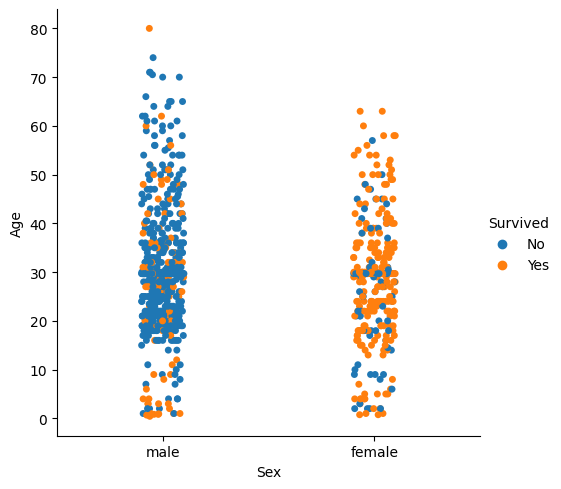

In [225]:
# la fonction de survivant en fonction  de != classe et age 

sns.catplot(y="Age", x="Sex", data= new_df, hue="Survived")
print("Pour notre presention il y'a plus d'hommes qui ont dans le titanic")

Voici une image plus précise de la distubution  de l’âge des passagers sur le Titanc:


<AxesSubplot: >

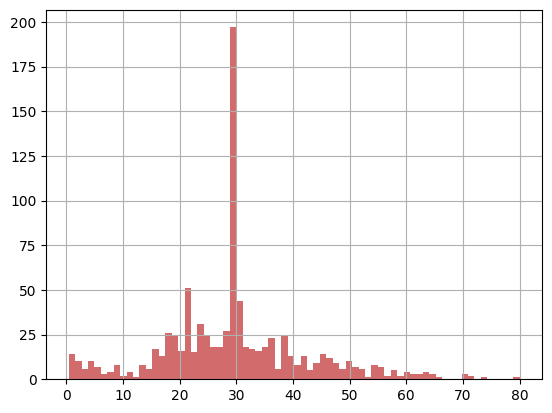

In [226]:
print("Voici une image plus précise de la distubution  de l’âge des passagers sur le Titanc:")
new_df['Age'].hist(bins=70,color='indianred',alpha=0.9)


In [227]:
def maj(passager):
    age,sex = passager
    # On compare les ages avec les differentes tenages d'ages 
    if  (age< 12):
    
  
        return "Enfant"
    elif (age>=12 and age < 18):
        return 'Ado'
    else:
        return sex
new_df['Person'] = new_df[['Age','Sex']].apply(maj,axis=1)  

print("Comme on peut le voir, il y en avait sur le Titanic :",

new_df.Person.value_counts().iloc[0] ,"hommes ,",
new_df.Person.value_counts().iloc[1]," femmes ,", 
new_df.Person.value_counts().iloc[2],"Enfants et",
new_df.Person.value_counts().iloc[3],"Ado") 

Comme on peut le voir, il y en avait sur le Titanic : 519 hommes , 257  femmes , 68 Enfants et 45 Ado


<AxesSubplot: >

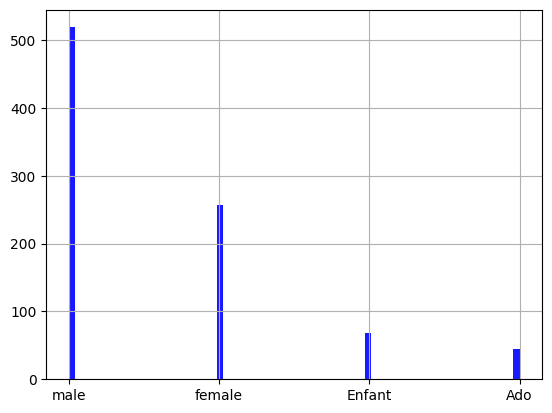

In [228]:
new_df['Person'].hist(bins=70,color='blue',alpha=0.9)

In [229]:
df = new_df

C:\Users\cleme\AppData\Local\Temp\ipykernel_15548\1059861326.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


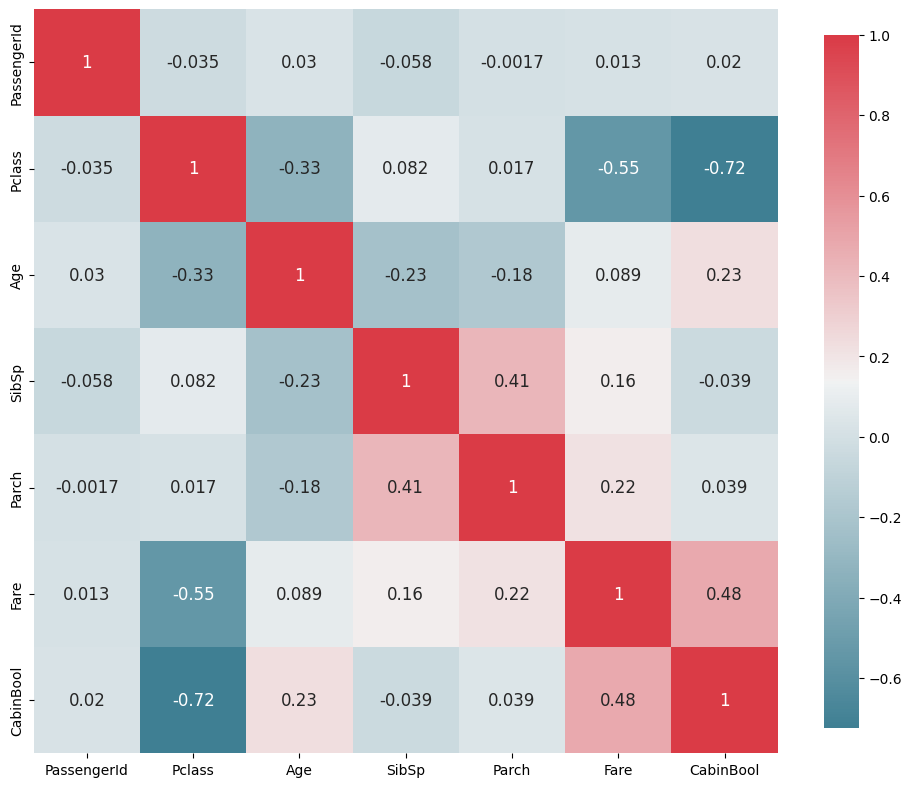

In [230]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics




. Appliquez la régression logistique. 

In [232]:
new_df['Sex']=new_df['Sex'].replace({"female":0,"male":1})
#features extraction
x = new_df[['Age', 'Pclass','Sex']]
y = new_df['Survived'] # le facture de sortir

In [233]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%



In [242]:
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train) 
 #fitting training data
y_pred  = logreg.predict(x_test) 
logreg.score(x,y)*100



80.08998875140607

2. Utilisez une matrice de confusion pour valider votre modèle.  

<AxesSubplot: xlabel='Prediction', ylabel='Actuellement'>

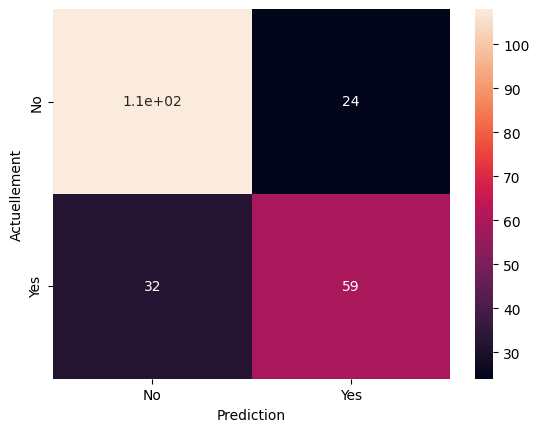

In [235]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actuellement'], colnames=['Prediction'])
sns.heatmap(confusion_matrix, annot=True)

# Confusion Matrix 

3. Une autre matrice de validation pour la classification est ROC/AUC. Faites vos recherches sur eux, expliquez-les et appliquez-les dans notre cas. 
 

In [258]:
x = new_df['Sex']
y = new_df['Survived']

In [259]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# On predit les probabilites de modele
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [260]:
from sklearn.metrics import roc_curve

# on rece roc curve 
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Création de taux de faux positifs et de vrais positifs et impression des scores

In [261]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)



0.81497668997669 0.7698551448551448


Pour la  matrice de validation pour la classification est ROC/AUC
Il s'agit ici de comparer la performance des models differents 